In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display
%matplotlib inline

We load the data, and take a quick look at it:

In [2]:
df = pd.read_csv("../part_b_spend_clean/output/part_b_spend_clean.csv")

In [3]:
df.head(10)

,hcpcs_code,hcpcs_description,year,claim_count,total_spending,beneficiary_count,total_annual_spending_per_user,unit_count,average_cost_per_unit,average_beneficiary_cost_share,annual_change_in_average_cost_per_unit
0,90371,Hepatitis B immune globulin for injection into...,2011,955.0,263564.03,304.0,866.986941,2307.0,114.245353,177.307138,NaN
1,90371,Hepatitis B immune globulin for injection into...,2012,787.0,320152.62,237.0,1350.854937,2966.0,107.940870,274.978650,NaN
2,90371,Hepatitis B immune globulin for injection into...,2013,715.0,287163.62,235.0,1221.972851,2712.0,105.886291,251.021447,NaN
3,90371,Hepatitis B immune globulin for injection into...,2014,639.0,238523.66,196.0,1216.957449,2124.0,112.299275,250.995561,NaN
4,90371,Hepatitis B immune globulin for injection into...,2015,619.0,257560.26,192.0,1341.459687,2315.0,111.257132,281.880938,NaN
5,90375,Rabies immune globulin for injection beneath t...,2011,1934.0,1505927.92,1855.0,811.820981,8503.5,177.095069,162.938054,NaN
6,90375,Rabies immune globulin for injection beneath t...,2012,2147.0,2240645.31,2070.0,1082.437348,11543.5,194.104501,216.785527,NaN
7,90375,Rabies immune globulin for injection beneath t...,2013,2156.0,2704537.39,2080.0,1300.258361,12926.0,209.232353,263.882788,NaN
8,90375,Rabies immune globulin for injection beneath t...,2014,2311.0,3746515.01,2241.0,1671.805002,16284.0,230.073386,339.956662,NaN
9,90375,Rabies immune globulin for injection beneath t...,2015,2360.0,4511996.63,2288.0,1972.026499,18163.3,248.412823,400.534768,NaN


Let's now form a set of drugs listed in the data; how many are there?

In [4]:
drugs = set(df['hcpcs_code'])
len(drugs)

638

Let's take a quick look at plots of the average spending, renormalized relative to the initial cost:

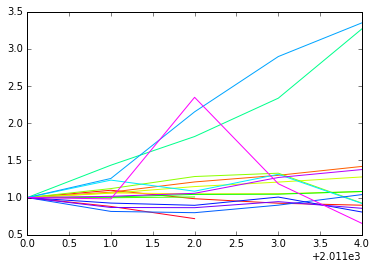

In [5]:
N = 20
cm = plt.get_cmap('gist_rainbow')
column = 'average_cost_per_unit'

for i,drug in zip(range(N),drugs):
    color = cm(1.*i/N) # color will now be an RGBA tuple
    df_tmp = df[df['hcpcs_code']==drug]
    initial_year = min(df_tmp['year'])
    initial_value = df_tmp[df_tmp['year']==initial_year][column].iloc[0]
    plt.plot(df_tmp['year'],df_tmp[column]/initial_value,color=color)

Recall that the year-over-year change is the ratio of the annual difference to the previous year's value, where the annual difference is the difference between the current value and the previous year's value. In other words for a series $a_t$, we compute:
$$\frac{a_t-a_{t-1}}{a_{t-l}},$$
where $t$ is the given year.

Let's compute these for various columns:

In [ ]:
columns_of_interest = ['claim_count','total_spending','beneficiary_count',
                       'total_annual_spending_per_user','unit_count',
                       'average_cost_per_unit','average_beneficiary_cost_share']
years = [2012,2013,2014,2015]
f = FloatProgress(min=0, max=len(drugs))
display(f)
for i,column in enumerate(columns_of_interest):
    print("Computing year-over-year increase for "+column+
          " number %d of %d"%(i,len(columns_of_interest)))
    f.value=0
    df[column+'_yr_ovr_yr']=np.nan
    for drug in drugs:
        f.value+=1
        for year in years:
            prev_year_val = df.loc[(df['hcpcs_code']==drug) & (df['year']==year-1),column].iloc[0]
            cur_year_val = df.loc[(df['hcpcs_code']==drug) & (df['year']==year),column].iloc[0]
            if np.isnan(prev_year_val) or np.isnan(cur_year_val): break
            df.loc[(df['hcpcs_code']==drug) & (df['year']==year),column+'_yr_ovr_yr']=\
            (cur_year_val-prev_year_val)/prev_year_val

Computing year-over-year increase for claim_count number 0 of 7


In [22]:
df[df['hcpcs_code']==list(drugs)[1]]

,hcpcs_code,hcpcs_description,year,claim_count,total_spending,beneficiary_count,total_annual_spending_per_user,unit_count,average_cost_per_unit,average_beneficiary_cost_share,annual_change_in_average_cost_per_unit,average_cost_per_unit_yr_ovr_yr
560,J0694,"Injection, cefoxitin sodium, 1 gm",2011,4595.0,54477.23,2460.0,22.145215,10088.0,5.400201,5.561634,NaN,NaN
561,J0694,"Injection, cefoxitin sodium, 1 gm",2012,4252.0,48334.15,2616.0,18.476357,8147.0,5.932754,4.489041,NaN,0.098617
562,J0694,"Injection, cefoxitin sodium, 1 gm",2013,4491.0,61086.38,2449.0,24.943397,11485.0,5.318797,5.759506,NaN,-0.103486
563,J0694,"Injection, cefoxitin sodium, 1 gm",2014,4858.0,69839.40,2267.0,30.806970,13989.0,4.992451,6.834976,NaN,-0.061357
564,J0694,"Injection, cefoxitin sodium, 1 gm",2015,5141.0,58789.28,2577.0,22.813069,12127.0,4.847801,5.441832,NaN,-0.028974


Let's take a quick look at plots of the year-over-year increase:

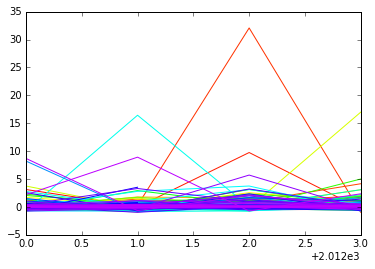

In [32]:
N = 700
cm = plt.get_cmap('gist_rainbow')
column = 'average_cost_per_unit'

for i,drug in zip(range(N),drugs):
    color = cm(1.*i/N) # color will now be an RGBA tuple
    df_tmp = df[df['hcpcs_code']==drug]
    plt.plot(df_tmp['year'],df_tmp[column+'_yr_ovr_yr'],color=color)